In [115]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [116]:
# read the data
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

# check the data structure (how big is it)
print("size of the train data: ", train.shape)
print("size of the test data: ", test.shape)

# first five lines
display(train.head())

# checking missing value
print("     training data")
print(train.isnull().sum())
print("     testing data")
print(test.isnull().sum())


size of the train data:  (891, 12)
size of the test data:  (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


     training data
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
     testing data
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


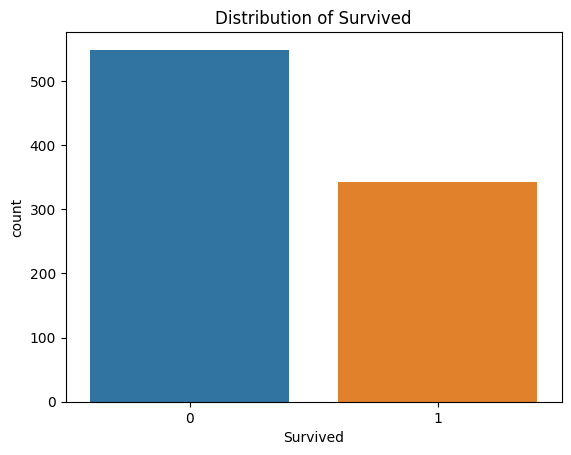

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

# distribution of Survived
sns.countplot(x='Survived', data=train)
plt.title('Distribution of Survived')
plt.show()

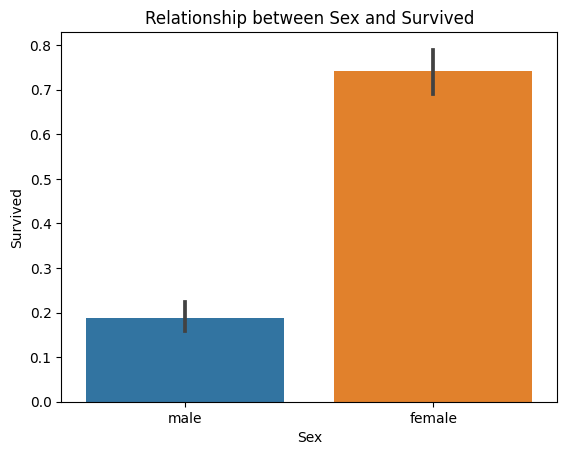

In [118]:
# Sex vs Survived
sns.barplot(x='Sex', y='Survived', data=train)
plt.title('Relationship between Sex and Survived')
plt.show()

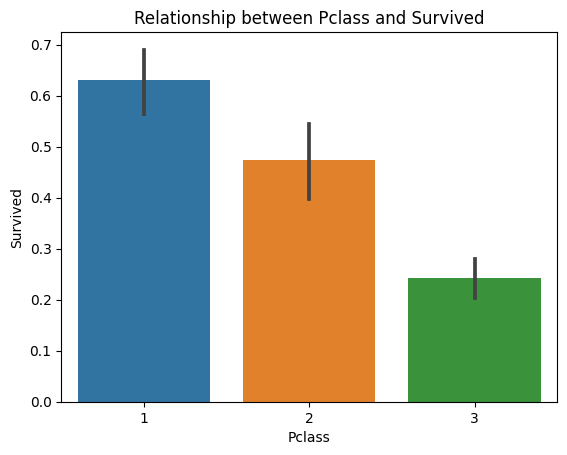

In [119]:
# Class vs Survived
sns.barplot(x='Pclass', y='Survived', data=train)
plt.title('Relationship between Pclass and Survived')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


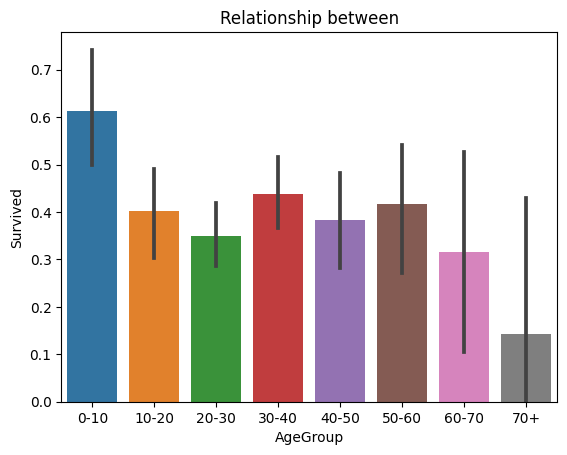

In [120]:
# Age vs Survived
bins = [0, 10, 20, 30, 40, 50, 60, 70, np.inf]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+']
# create a new feature called "AgeGroup"
train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels, right=False)
test['AgeGroup'] = pd.cut(test['Age'], bins=bins, labels=labels, right=False)

sns.barplot(x='AgeGroup', y='Survived', data=train)
plt.title('Relationship between')
plt.show()

In [121]:
# Fullfill Age (Using median)
train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())

# Fullfill
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

In [122]:
# Deleting the features that not usefull(Cabin - lose too much, Ticket, Name)
train = train.drop('Cabin', axis=1)
test = test.drop('Cabin', axis=1)

train = train.drop('Name', axis=1)
test = test.drop('Name', axis=1)

train = train.drop('Ticket', axis=1)
test = test.drop('Ticket', axis=1)

print(train.columns)
print(test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'AgeGroup'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'AgeGroup'],
      dtype='object')


In [123]:
# Transfer all the non-numeric values to numeric values form
# male - 0, female - 1
for df in (train,test):
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Embarked & AgeGroup
to_dummify = ['Embarked', 'AgeGroup']

train = pd.get_dummies(train, columns=to_dummify, drop_first=True)
test = pd.get_dummies(test, columns=to_dummify, drop_first=True)

# Transfer boolean value to numeric value
for df in [train, test]:
    bool_cols = df.select_dtypes(include='bool').columns
    df[bool_cols] = df[bool_cols].astype(int)

In [124]:
print(train.columns.tolist())
print(test.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S', 'AgeGroup_10-20', 'AgeGroup_20-30', 'AgeGroup_30-40', 'AgeGroup_40-50', 'AgeGroup_50-60', 'AgeGroup_60-70', 'AgeGroup_70+']
['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S', 'AgeGroup_10-20', 'AgeGroup_20-30', 'AgeGroup_30-40', 'AgeGroup_40-50', 'AgeGroup_50-60', 'AgeGroup_60-70', 'AgeGroup_70+']


In [125]:
print(train.head(10))

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  \
0            1         0       3    0  22.0      1      0   7.2500   
1            2         1       1    1  38.0      1      0  71.2833   
2            3         1       3    1  26.0      0      0   7.9250   
3            4         1       1    1  35.0      1      0  53.1000   
4            5         0       3    0  35.0      0      0   8.0500   
5            6         0       3    0  28.0      0      0   8.4583   
6            7         0       1    0  54.0      0      0  51.8625   
7            8         0       3    0   2.0      3      1  21.0750   
8            9         1       3    1  27.0      0      2  11.1333   
9           10         1       2    1  14.0      1      0  30.0708   

   Embarked_Q  Embarked_S  AgeGroup_10-20  AgeGroup_20-30  AgeGroup_30-40  \
0           0           1               0               1               0   
1           0           0               0               0               1  

In [126]:
print(test.head(10))

   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  \
0          892       3    0  34.5      0      0   7.8292           1   
1          893       3    1  47.0      1      0   7.0000           0   
2          894       2    0  62.0      0      0   9.6875           1   
3          895       3    0  27.0      0      0   8.6625           0   
4          896       3    1  22.0      1      1  12.2875           0   
5          897       3    0  14.0      0      0   9.2250           0   
6          898       3    1  30.0      0      0   7.6292           1   
7          899       2    0  26.0      1      1  29.0000           0   
8          900       3    1  18.0      0      0   7.2292           0   
9          901       3    0  21.0      2      0  24.1500           0   

   Embarked_S  AgeGroup_10-20  AgeGroup_20-30  AgeGroup_30-40  AgeGroup_40-50  \
0           0               0               0               1               0   
1           1               0               0

In [127]:
# Separate the features and target variable
X = train.drop('Survived', axis=1)
y = train['Survived']

In [128]:
# Split the train set into two parts(predicting the result)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [129]:
# Using the Random Forest model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [130]:
from sklearn.metrics import accuracy_score

# Predicting a y_pred using the model given by X_val
y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)

print(accuracy)

0.8212290502793296


In [131]:
original_test = pd.read_csv('/kaggle/input/titanic/test.csv')
test_ids = original_test['PassengerId']

In [132]:
pred_test = model.predict(test)

In [133]:
submission = pd.DataFrame({
    "PassengerId": test_ids,
    "Survived": pred_test
})

submission.to_csv("submission.csv", index=False)